<a href="https://colab.research.google.com/github/FerMarcs/SSF-Oto24FernandaPamelaMarcosGonzalez/blob/main/Tarea%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

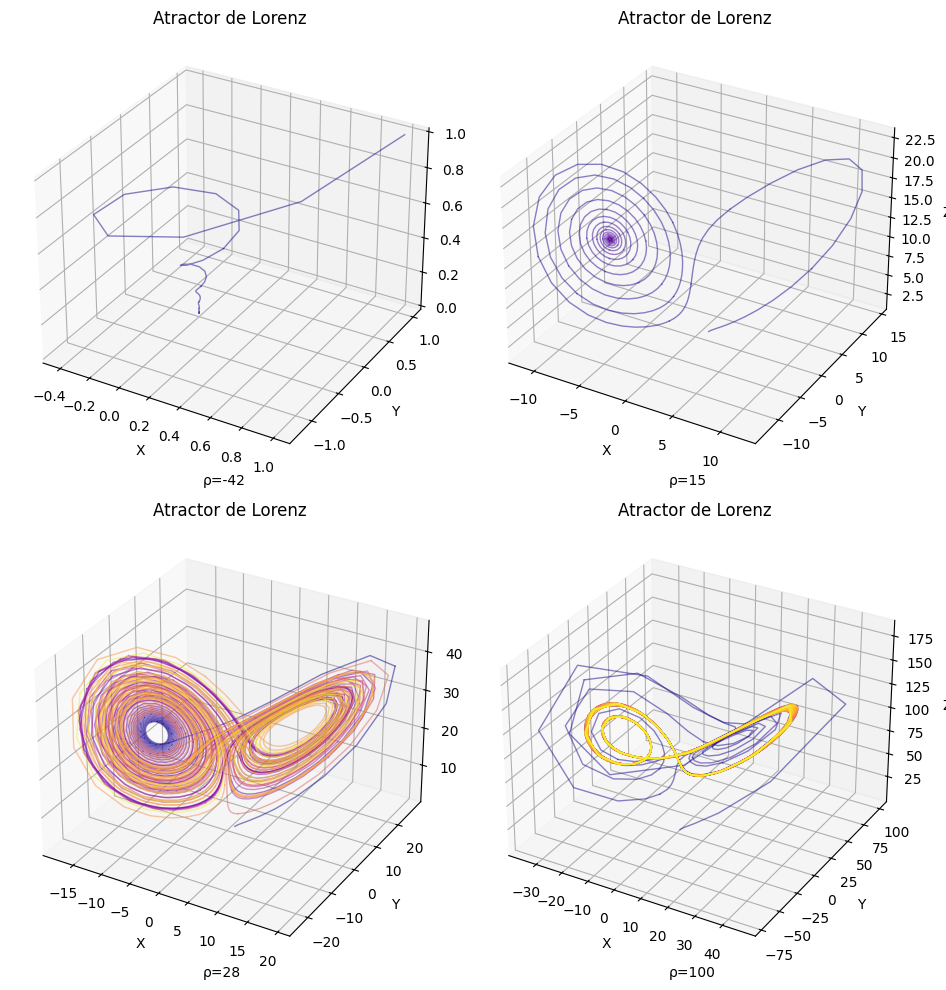

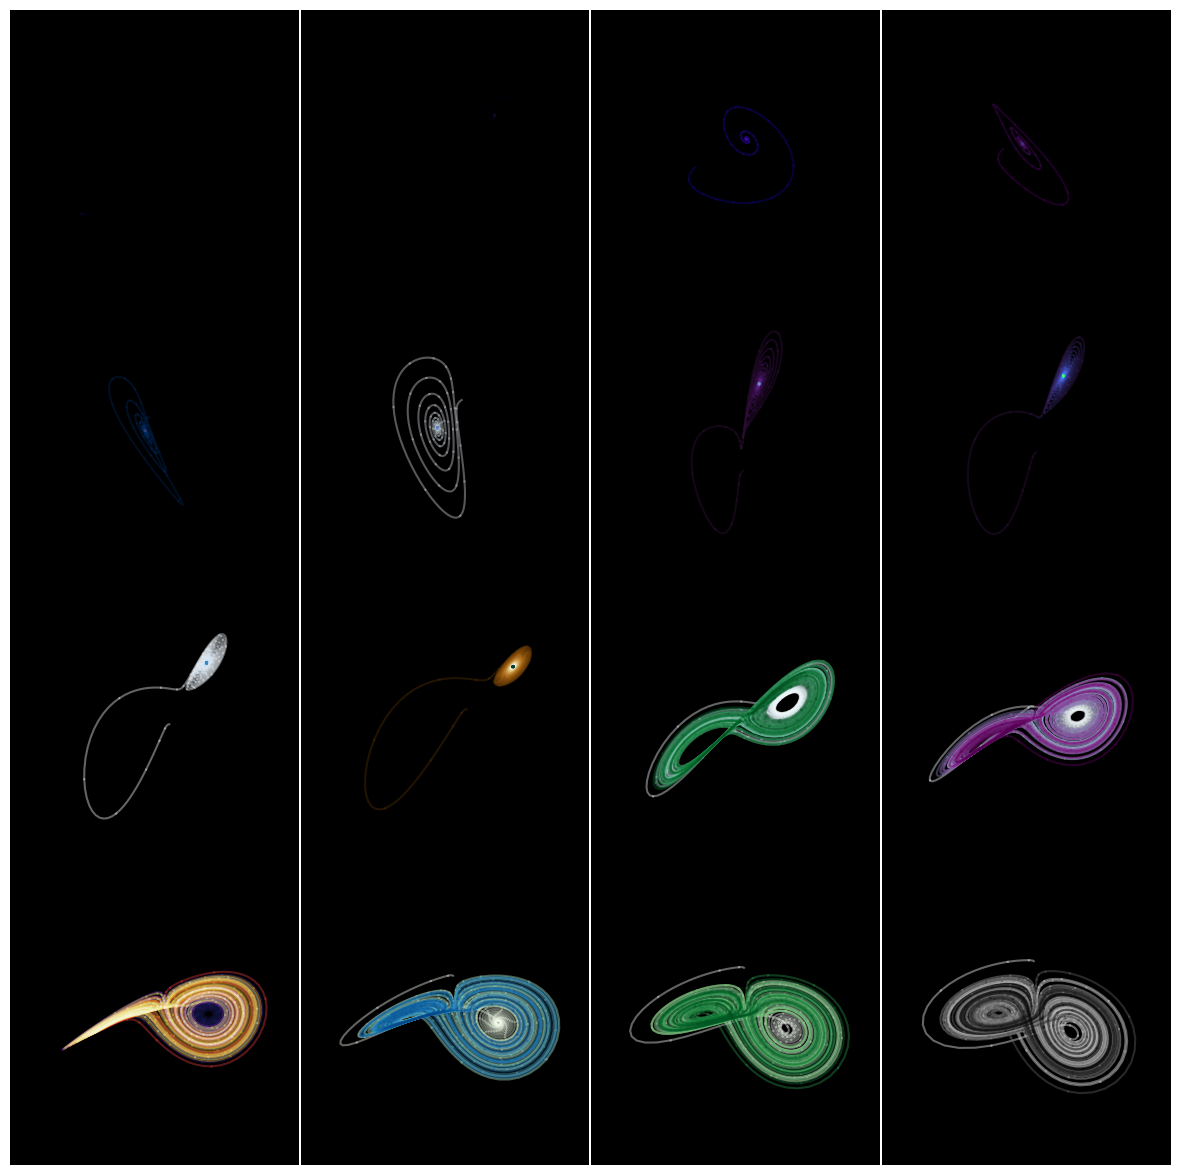

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Definir el sistema de ecuaciones de Lorenz
def lorenz(state, t, σ, ρ, β):
    x, y, z = state
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    return [dx, dy, dz]

# Función para resolver y graficar el atractor de Lorenz
def solve_lorenz(state0, parameters, ax=None, text_offset=0.01):
    σ, ρ, β = parameters
    n = 3000
    t = np.linspace(0, 100, n)

    # Resolvemos las ecuaciones para la secuencia de puntos t
    states = odeint(lorenz, state0, t, args=(σ, ρ, β))
    xs = states[:, 0]
    ys = states[:, 1]
    zs = states[:, 2]

    if ax is None:
        ax = plt.figure(figsize=(7, 8)).add_subplot(projection='3d')

    # Intervalos de 10 unidades de ancho
    s = 10
    cmap = plt.cm.plasma

    # Graficar segmentos en el colormap
    for i in range(0, n - s, s):
        ax.plot(xs[i:i + s + 1], ys[i:i + s + 1], zs[i:i + s + 1], color=cmap(i / n), alpha=0.5, lw=1)

    ax.text2D(0.44, text_offset, f"ρ={ρ}", transform=ax.transAxes)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Atractor de Lorenz")
    plt.tight_layout()
    return ax.figure

# Ejemplo para visualizar el atractor de Lorenz para diferentes valores de ρ
rho_values = [-42, 15, 28, 100]
fig, axs = plt.subplots(2, 2, figsize=(10, 10), subplot_kw=dict(projection='3d'))
rho_values2d = np.array(rho_values).reshape(2, 2)

for row, col in np.ndindex((2, 2)):
    rho = rho_values2d[row, col]
    solve_lorenz((1, 1, 1), (10, rho, 8 / 3), ax=axs[row, col], text_offset=-0.03)

plt.show()

# Función adicional para el "efecto mariposa" con varios subplots
def butterfly(ax, colormap, rho, angle):
    tmax = 100
    n = 10000
    sigma, beta = 10, 2.667
    u0, v0, w0 = (0, 1, 1.05)
    t = np.linspace(0, tmax, n)

    soln = odeint(lorenz, (u0, v0, w0), t, args=(sigma, rho, beta))
    x, y, z = soln[:, 0], soln[:, 1], soln[:, 2]

    ax.set_facecolor('k')
    cmap = getattr(plt.cm, colormap)
    s = 10

    for i in range(0, n - s, s):
        ax.plot(x[i:i + s + 1], y[i:i + s + 1], z[i:i + s + 1], color=cmap(i / n), alpha=0.4)

    ax.set_axis_off()
    ax.view_init(angle, angle)

# Crear una matriz de subplots con diferentes colormaps y valores de ρ
fsize = (15, 15)
ndim = 4
fig, axs = plt.subplots(ndim, ndim, figsize=fsize, subplot_kw=dict(projection='3d'))
plt.subplots_adjust(wspace=0, hspace=0)

for i, (row, col) in enumerate(np.ndindex((ndim, ndim))):
    butterfly(axs[row, col], plt.colormaps()[i % len(plt.colormaps())], rho=2.5 * i, angle=10 * i)

plt.show()
